# Рубежный контроль №2

### Дьячков Михаил ИУ5-61Б

## Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

- Метод №1: Линейная/логистическая регрессия
- Метод №2: Случайный лес

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Загрузка датасета
data = pd.read_csv("dc-wikia-data.csv")

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


### Предобработка данных 

In [4]:
#Проверка типов данных
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [5]:
#Размер датасета
data.shape

(6896, 13)

In [6]:
#Проверка пустых значений
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [7]:
#Удаление строк с пустыми значениями
data = data.dropna(axis=0)

In [8]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

<AxesSubplot:>

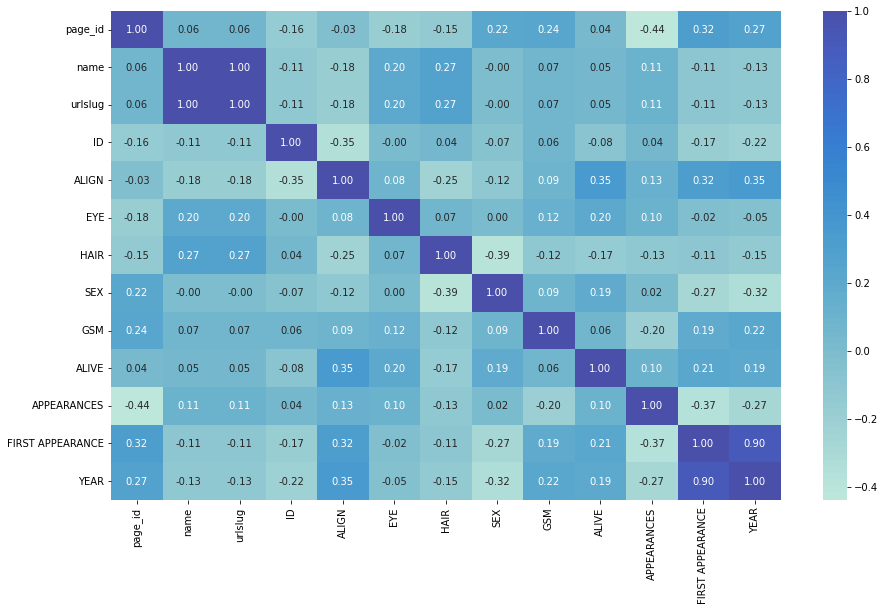

In [10]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=2)

В качестве целевого признака возьмём столбец "FIRST APPEARANCE"

In [15]:
#Разделение выборки на обучающую и тестовую
target = "FIRST APPEARANCE"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

### Линейная регрессия

In [16]:
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

Для оценки качества будем использовать:
- коэффициента детерминации, чтобы узнать насколько модель близка к высококачественной
- корень из средней квадратичной ошибки, чтобы выделить большие ошибки в предсказании модели

In [17]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

In [18]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_LR))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_LR))

Оценка качества модели с помощью коэффициента детерминации: 0.6824717670387186
Корень из средней квадратичной ошибки: 44.37457055633908


С помощью используемых метрик, можем сделать вывод, что качество модели относительно низкое в связи с недостаточной корреляцией целевого признака с другими параметрами

### Случайный лес

In [19]:
RT = RandomForestRegressor(n_estimators=10, random_state=1)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [20]:
R2_RT = r2_score(testY, RT.predict(testX))

In [21]:
RMSE_RT= mean_squared_error(testY, RT.predict(testX), squared=True)

In [22]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RT))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RT))

Оценка качества модели с помощью коэффициента детерминации: 0.9809033989266548
Корень из средней квадратичной ошибки: 2.6687499999999984


В данном случае, можем увидеть, что ансамблевая модель случайного леса предсказывает значения с наибольшей точностью в отличие от модели линейной регрессии. Качество модели хорошее.